In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 선형회귀 (LinearRegression)

- 선형 회귀?
  - 알려진 다른 관련 데이터 값을 사용하여 알 수 없는 데이터의 값을 예측하는 데이터 분석 기법
  - 알 수 없는 변수(= 종속 변수)와 알려진 변수(=독립 변수)를 선형 방정식으로 수학적으로 모델링한다.
- 선형 회귀는 기계 학습 및 인공지능과 같은 많은 데이터 과학 방법에서 선형 회귀를 사용하여 복잡한 문제를 해결한다.
- 선형 회귀는 y=ax+b의 식을 기본으로 한다.
- 올바른 선을 그리기 위해 기울기 ax, 절편 b의 값을 알아야하고 사이킷런은 이와 관련된 함수를 제공한다.
- coef_, intercept_ 의미? : 사이킷런 모델은 학습한 값들을 저장할 때 다른 속성과의 구분을 위해 밑줄을 그어준다.
  - coef_ : 기울기[np배열]
  - intercept_ : 절편



---


** **기계 학습에서 선형 회귀란?** **

1. 선형 관계
  - 데이터 사이언티스트는 x 및 y 값의 무작위 모음인 산점도를 만들어 직선을 따라 표시되는지 확인해야한다.
  - 그렇지 않은 경우 제곱근이나 로그와 같은 비선형 함수를 적용하여 두 변수 간의 선형 관계를 수학적으로 만들 수 있다.

2. 잔차 독립성
  - 데이터 사이언티스트는 잔차를 사용하여 예측 정확도를 측정한다.
  - 잔차는 관측된 데이터와 예측된 값 간의 차이이다.
  - 잔차 사이에 식별 가능한 패턴이 없어야 한다.
  - Durbin-Watson 검정과 같은 다양한 수학 검정을 사용하여 잔차 독립성을 확인할 수 있다. 더미 데이터를 사용하여 계절 데이터와 같은 데이터 변형을 바꿀 수 있다.

3. 정규성
  - Q-Q플롯과 같은 그래프 기술은 잔차가 정규 분포를 따르는지 여부를 결정한다.
  - 잔차는 그래프 중앙의 대각선을 따라 있어야 한다.
  - 잔차가 정규화되지 않은 경우 데이터에서 임의의 이상값이나 일반적이지 않은 값을 검정할 수 있다.
  - 이상값을 제거하거나 비선형 변환을 수행하면 문제를 해결 가능하다.

4. 등분산성
  - 등분산선은 잔차가 x의 모든 값에 대해 평균에서 일정한 분산 또는 표준 편차를 갖는다고 가정한다. 그렇기 않으면 분석 결과가 정확하지 않을 수 있다. 이 가정이 충족되지 않으면 종속 변수를 변경해야 할 수 있다.
  - 분산은 대규모 데이터 세트에서 자연스럽게 발생하므로 종속 변수의 척도를 변경하는 것이 합리적이ㅏㄷ.



---
** 선형 회귀 유형 **
1. 단순 선형 회귀
2. 다중 선형 회귀
3. 로지스틱 회귀

  

In [ ]:
# [1] 라이브러리 및 데이터 불러오기

import numpy as np #수치 연산을 위한 numpy라이브러리 부름
from sklearn.datasets import fetch_california_housing #scikit-learn에서 제공하는 캘리포니아 주택 데이터셋 가져옴
from sklearn.model_selection import train_test_split #데이터를 학습용과 테스트용으로 나누는 함수 불러옴
from sklearn.linear_model import LinearRegression #선형 회귀 모델 사용하기 위해 부름
from sklearn.metrics import mean_squared_error #평균 제곱 오차 계산하기 위해 부름
import matplotlib.pyplot as plt #데이터 시각화를 위해 부름

In [ ]:
# [2] 데이터 확인

# fetch_california_housing 함수를 사용하여 캘리포니아 주택 데이터를 불러옵니다.
housing = fetch_california_housing()

# 데이터의 형태 확인
print(housing.data.shape, housing.target.shape)

# 데이터의 특성들을 확인
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
# [3] 데이터 전처리

'''
- testsize : 테스트는 나누는 기준
- housing.target : 타켓 데이터
- [:,0:1] -> :는 전체 데이터, 0:1은 0번 데이터 셋을 선택
- testsize에서 0.8 = 80%는 학습 = X_train, 0.2 = 20%는 테스트 = X_test
- y데이터는 1차원, x데이터는 2차원
'''
# train_test_split 함수를 사용하여 데이터를 학습용과 테스트용으올 나눈다.
# 여기서는 전체 데이터셋의 80%를 학습에 사용하고 20$를 테스트에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(housing.data[:, :], housing.target, test_size=0.2, random_state=42)
'''
특징을 5개 사용해보기. 0,1,2,3,4
[:, :]이면 8개 데이터를 다 사용 -> 학습정확도는 높아감, 예측정확도도 높아짐
'''

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [ ]:
#.fit은 학습됨 -> 훈련데이터 x,y르 넣음
# score는 학습의 정확도이다. 0.47는 47%이다. -> 50%도 안돼서 정확도 낮음
# w값이 0.41...이다
# x_test 4128를 전부다 나눔
# MSE를 사용해서 예측한다.

In [ ]:
# [4] 선형 회귀 모델 학습

# LinearRegression 클래스를 사용하여 선형 회귀 모델을 생성합니다.
regr = LinearRegression()

# 학습용 데이터 (X_train, y_train)을 사용하여 모델을 학습시킨다.
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# [5] 모델 평가

# 학습된 모델의 성능을 평가합니다.

regr.score(X_train, y_train) #학습된 모델의 결정 계수를 계산하여 학습 성능을 평가
regr.coef_ #각 입력 특성의 회귀 계수(coefficients)를 출력
regr.intercept_ #모델의 절편(intercept)을 출력

# 학습된 모델을 사용하여 테스트 데이터 (X_test)에 대한 예측값을 생성한다.
y_pred = regr.predict(X_test)

# 예측값 (y_pred)과 실제값 (y_test)을 비교하여 모델의 예측 정확도를 평가한다.
# mean_squared_error함수를 사용하여 예측값과 실제값 사이의 평균 제곱 오차를 계산하고 출력한다.
print('Mean squared error : %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error : 0.56


In [ ]:
#[6] 추가적인 실험

# 데이터와 타켓을 각각 'feature, target변수에 할당하고 다시 train_tst_split함수를 사용하여 데이터를 나눈다.
# 새로운 선형 회귀 모델을 생성하고, 같은 방식으로 학습하고 평가한다.
feature, target = housing.data, housing.target
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)
# random state = 42는 고정된 값
regg = LinearRegression()
regg.fit(feature_train, target_train)

LinearRegression()

In [ ]:
regg.score(feature_train, target_train)
regg.coef_
regg.intercept_
target_pred = regg.predict(feature_test)
print('Mean squared error : %.2f' % mean_squared_error(target_test, target_pred))

Mean squared error : 0.56


#[사이킷런의 선형 회귀 라이브러리 이용법]

fit(self, X, y[, sample_wight]) : 선형 모델에 적합(훈련)하기

get_parames(self[, deep]) : 파라미터 값 획득

predict(self, X) : 선형모델을 사용하여 예측

score(self, X, y[, sample_weight]) : 예측에 대한 결정계수의 정확도 반환

  - 정확도는 종류가 여러 가지이다.

set_parames(self, \*\*params) : 파라미터 값 설정

#사이킷런 함수: 오류 검정


sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None,
multioutput='uniform_average', squared=True)


sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput='unifor
m_average')

In [ ]:
# 선형회귀 예제 (1)
'''
- np.newaxis : 축을 하나 추가함 => 즉, 차원이 하나 늘어남(1차원 추가됨)
  -> 현재 코드는 3차원이다. 대괄호가 3개임.

- numpy는 차원이 맞아야함

[: , np.newaxis, 0] : 선택은 0번해라. 첫번째꺼만 추가해라.
[: , np.newaxis, 1] : 선택은 1번해라. 두번째꺼만 추가해라.
  -> 현재 코드는 2행 1열이 된다.
'''
import numpy as np
x = np.arange(3)
x

array([0, 1, 2])

In [ ]:
x[:,np.newaxis, np.newaxis]

array([[[0]],

       [[1]],

       [[2]]])

In [ ]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
a[:, np.newaxis, 0]

array([[1],
       [3]])

In [ ]:
# 선형회귀 예제 (2)
x = np.array([[1,1],[1,2],[2,2],[2,3]])
x

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [ ]:
y = np.dot(x, np.array([1,2])) + 3

In [ ]:
reg = LinearRegression().fit(x,y)

In [ ]:
reg.score(x,y)

1.0

In [ ]:
reg.coef_

In [ ]:
'''
reg.intercept_ 에서 값이 3.00000018인 이유는?
-> 18은 쓰레기 값이라고 생각하기
'''
reg.intercept_

3.0000000000000018

In [ ]:
reg.predict(np.array([[3,5]]))

array([16.])

In [ ]:
#날씨정보 불러오기 -> kaggle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Humidity 변수를 입력(xx)으로 선택
xx = weather[['Humidity']]

# Temperature (C)를 타겟(yy)으로 선택
yy = weather['Temperature (C)']

In [ ]:
# train_test_split 함수를 사용하여 데이터를 학습용(xx_train, yy_train)과 테스트용(xx_test, yy_test)으로 나눕니다.
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

In [ ]:
# LinearRegression() 객체를 생성하고, 학습용 데이터를 사용하여 모델을 학습시킵니다
reg = LinearRegression()
reg.fit(xx_train, yy_train)

LinearRegression()

In [ ]:
reg.score(xx_train, yy_train) # 학습된 모델의 결정 계수를 계산하여 학습 성능을 평가

0.4007432667666295

In [ ]:
reg.coef_ #회귀 모델의 기울기(coefficients)를 출력

array([-30.9101215])

In [ ]:
reg.intercept_ #모델의 절편(intercept)을 출력

34.65474643713257

In [ ]:
yy_pred = reg.predict(xx_test) #테스트 데이터에 대한 예측값을 생성

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(yy_test, yy_pred)) #예측값과 실제값 사이의 평균 제곱 오차를 계산하여 출력

Mean squared error: 55.68


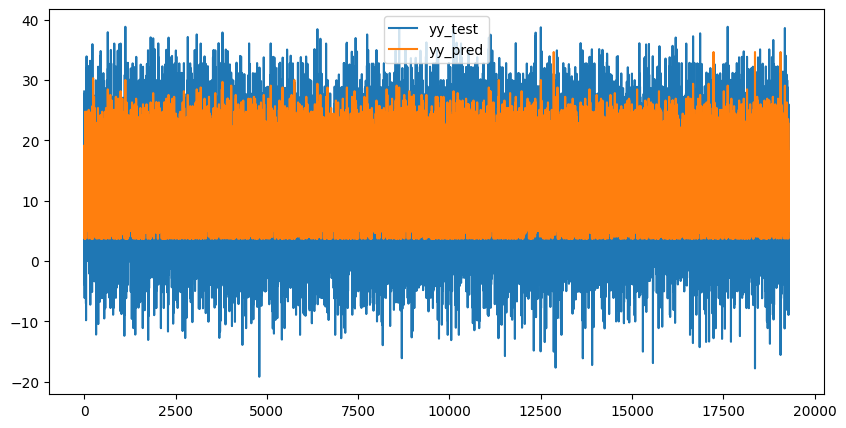

In [ ]:
#matplotlib을 사용하여 실제값(yy_test)과 예측값(yy_pred)을 시각적으로 비교합니다.
#.figure(): 이 함수는 새로운 그림(figure)을 생성
#figsize=(10, 5): 이 매개변수는 그림의 크기를 지정합니다. 튜플 형태로 (가로 크기, 세로 크기)를 설정할 수 있습니다.
#예제에서는 가로 10 인치, 세로 5 인치의 크기로 그림을 만듭니다.
plt.figure(figsize=(10,5))

#plt.plot() 함수로 각각의 데이터를 선 그래프로 그립니다.
plt.plot(yy_test.to_numpy(), label='yy_test')
plt.plot(yy_pred, label='yy_pred')

# plt.legend()를 사용하여 범례를 추가하고, plt.show()로 그래프를 출력
plt.legend(loc='upper center')
plt.show()

In [ ]:
# 불필요한 열(Formatted Date, Summary, Precip Type, Daily Summary)을 제거하고, NaN 값들을 해당 열들의 평균 값으로 채웁니다.
weather = weather.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)
weather = weather.fillna(weather.mean())

# Temperature (C)를 타겟(y)으로 선택하고, 나머지 열들을 입력(X)으로 선택하여 데이터를 준비합니다.
X = weather.drop('Temperature (C)', axis=1)
y = weather['Temperature (C)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.score(X_train, y_train) #학습된 모델의 결정 계수를 계산하여 학습 성능을 평가

0.9900989693577028

In [ ]:
lin_reg.coef_ #회귀 모델의 기울기(coefficients)를 출력

array([ 8.72566684e-01, -1.41898621e+00,  7.97670315e-02, -4.04011835e-04,
        8.62917874e-03,  0.00000000e+00, -2.05656529e-04])

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
print('Mean squared error : %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error : 0.90


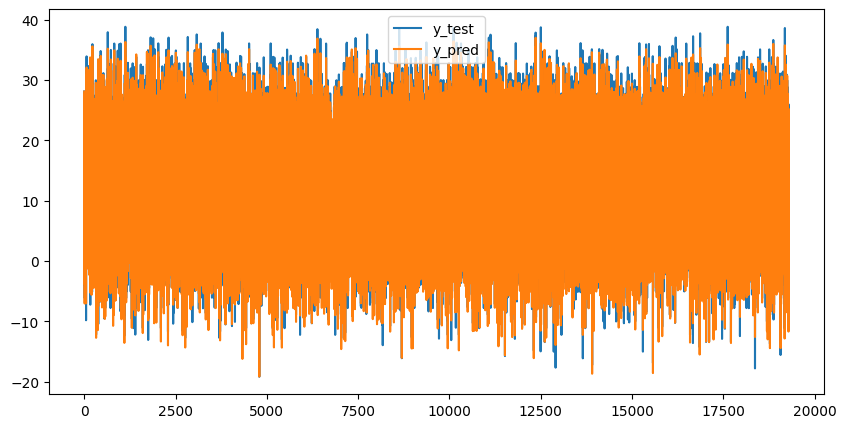

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.to_numpy(), label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend(loc='upper center')
plt.show()

In [ ]:
new_data = np.array([[0.75, 0.55, 5.0, 180, 10, 0, 1015.0]])
new_pred = lin_reg.predict(new_data)
new_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.90963176])


# 단순 선형 회귀
- 독립변수 x의 개수가 하나일때
- y = Wx + b


# 다중 선형 회귀
- 독립변수 x의 개수가 여러개인 선형회귀
- H(x) = W1X1 + W2X2 + W3X3 + b


In [ ]:
# 단순선형 회귀
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
laliga = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/laliga_player_stats_english.csv')
laliga.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [ ]:
laligaGoal = laliga[laliga["Goals scored"] >= 1]

In [ ]:
X = np.array(laligaGoal["Shots"])
y = np.array(laligaGoal["Goals scored"])
xx = X[:,np.newaxis]
yy = y[:,np.newaxis]

In [ ]:
xx_train = xx[:-75]
xx_test = xx[-75:]
yy_train = yy[:-75]
yy_test = yy[-75:]

In [ ]:
reg = LinearRegression().fit(xx_train, yy_train)
reg

LinearRegression()

In [ ]:
reg.score(xx_train, yy_train)

0.7649617284589343

In [ ]:
reg.coef_

array([[0.200703]])

In [ ]:
reg.intercept_

array([-0.97547881])

In [ ]:
yy_rrr = reg.predict(xx_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error : %.2f' % mean_squared_error(yy_test, yy_rrr))

Mean squared error : 6.14


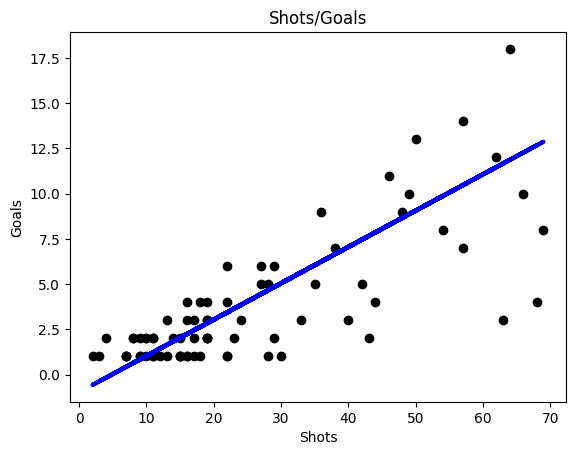

In [ ]:
plt.scatter(xx_test, yy_test, color='black')
plt.plot(xx_test, yy_rrr, color='blue', linewidth=3)
plt.title('Shots/Goals')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.xticks()
plt.yticks()
plt.show()

In [ ]:
ex_test = np.array([[73],[45],[24],[102]])
ex_Goal = np.array([[10],[5],[6],[17]])
ex_pred = reg.predict(ex_test)
ex_pred

array([[13.67584035],
       [ 8.05615629],
       [ 3.84139324],
       [19.49622741]])

In [ ]:
# 다중 선형 회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
laliga = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/laliga_player_stats_english.csv')
laliga.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [ ]:
laliga['Position'] = laliga['Position'].map({'Goalkeeper':0, 'Defender':1, 'Midfielder':3, 'Forward':4})
laliga["Minutes played"] = laliga["Minutes played"].fillna(0)
laliga["Games played"] = laliga["Games played"].fillna(0)
laliga["Shots"] = laliga["Shots"].fillna(0)
laliga["Shots on target"] = laliga["Shots on target"].fillna(0)
laliga["Assists"] = laliga["Assists"].fillna(0)
laliga["Passes"] = laliga["Passes"].fillna(0)

feature = laliga[["Minutes played", "Games played", "Shots", "Shots on target", "Assists", "Passes"]]
Goal = laliga["Goals scored"]

In [ ]:
feature

,Minutes played,Games played,Shots,Shots on target,Assists,Passes
0,0.000,0,0,0,0,0.0
1,0.000,0,0,0,0,0.0
2,2.790,31,0,0,1,887.0
3,630.000,7,0,0,0,155.0
4,1.063,12,9,3,0,536.0
...,...,...,...,...,...,...
551,0.000,0,0,0,0,0.0
552,0.000,0,0,0,0,0.0
553,2.317,35,54,33,1,740.0
554,1.259,33,22,15,1,270.0


In [ ]:
feature_train, feature_test, Goal_train, Goal_test = train_test_split(feature, Goal, test_size=0.3, random_state=10)
rege = LinearRegression()
rege.fit(feature_train, Goal_train)

LinearRegression()

In [ ]:
rege.score(feature_train, Goal_train)

0.8795681342741181

In [ ]:
rege.coef_

array([-4.07915966e-04, -1.88669363e-02, -3.91876571e-02,  4.23132914e-01,
        7.58910830e-02,  1.18050868e-04])

In [ ]:
rege.intercept_

0.010145553964054477

In [ ]:
Goal_pred = rege.predict(feature_test)

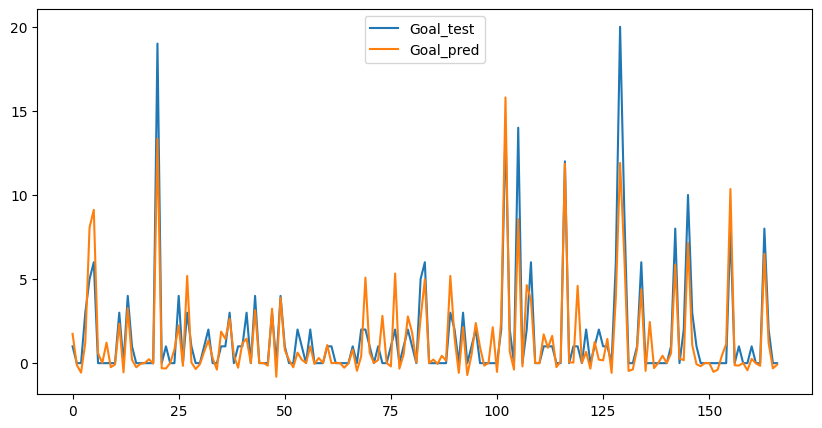

In [ ]:
Goal_test = Goal_test.to_numpy()
plt.figure(figsize=(10,5))
plt.plot(Goal_test, label='Goal_test')
plt.plot(Goal_pred, label='Goal_pred')
plt.legend(loc='upper center')
plt.show()

In [ ]:
# 선수들의 데이터를 리스트로 구성
Rakitic = [2000, 24, 73, 34, 5, 829]
Leekangin = [500, 8, 45, 19, 2, 356]
Ramos = [1200, 15, 24, 3, 3, 644]
Benzema = [255, 33, 102, 52, 6, 1393]

In [ ]:
input_data = np.array([Rakitic, Leekangin, Ramos, Benzema])

In [ ]:
predictions = rege.predict(input_data)

print(predictions)

[10.74464684  6.12514115 -0.12976467 17.90907995]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
